<a href="https://colab.research.google.com/github/spradeepgit/Airbnb-Booking-Analysis/blob/main/Airbnb_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Since 2008, guests and hosts have used Airbnb to expand on traveling possibilities and present a more unique, personalized way of experiencing the world. Today, Airbnb became one of a kind service that is used and recognized by the whole world. Data analysis on millions of listings provided through Airbnb is a crucial factor for the company. These millions of listings generate a lot of data - data that can be analyzed and used for security, business decisions, understanding of customers' and providers' (hosts) behavior and performance on the platform, guiding marketing initiatives, implementation of innovative additional services and much more. </b>

## <b>This dataset has around 49,000 observations in it with 16 columns and it is a mix between categorical and numeric values. </b>

## <b> Explore and analyze the data to discover key understandings (not limited to these) such as : 
* What can we learn about different hosts and areas?
* What can we learn from predictions? (ex: locations, prices, reviews, etc)
* Which hosts are the busiest and why?
* Is there any noticeable difference of traffic among different areas and what could be the reason for it? </b>

# **Libraries -**

In [2]:
# First, Let's Import the "Libraries" -
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

! pip install plotly
import plotly.express as px

import warnings
warnings.filterwarnings(action="ignore")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Reading Data

In [3]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# CSV file loaction path
file_path= '/content/drive/MyDrive/Almabetter Projects/Airbnb/Airbnb NYC 2019.csv'

In [5]:
# importing csv file into Pandas dataframe.
df_Listings=pd.read_csv(file_path)

In [6]:
#Checking the "Shape" of this DataFrame.
df_Listings.shape
    # So, we can see over here that we've somewhere around "1.20K" Rows and "20" Columns in this DataSet.

(48895, 16)

In [7]:
#Checking the different 'Columns' available -
df_Listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
#Check the Data Types of Each and Every "Column".
df_Listings.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

## Inference :

After running the above code you will get a report as shown in the above figure. This report contains various sections or tabs. ‘Overview’ section of this report provides us with all the basic information of the data we are using. For the data, We are using, we got the following information:

*   Number of Variables = 16
*   Number of Rows = 48895
*   Duplicate Rows = 0
*   Number of Numerical Features = 10
*   Number of Categorical Features = 6

## Data Preparation / Pre-processing -

In [9]:
df_Listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
df_Listings.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2
48894,36487245,Trendy duplex in the very heart of Hell's Kitchen,68119814,Christophe,Manhattan,Hell's Kitchen,40.76404,-73.98933,Private room,90,7,0,NaN,NaN,1,23


In [11]:
df_Listings.shape

(48895, 16)

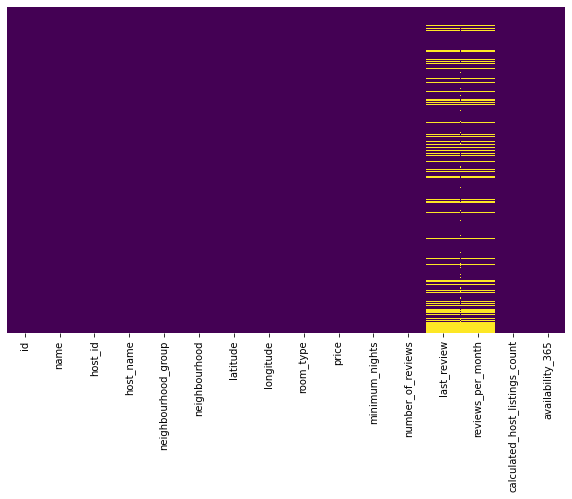

In [12]:
#Plot the Missing Data on HeatMap -
plt.figure(figsize=(10,6))
sns.heatmap(df_Listings.isnull(), yticklabels = False, cmap = 'viridis', cbar = False)

## Handling Missing Values - (Data Cleaning):

In [13]:
df_Listings.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### Data Cleaning & Imputation : "name" Feature -

In [14]:
#Computing the Mode of this Feature -
Mode = df_Listings["name"].mode()
Mode

0    Hillside Hotel
dtype: object

In [15]:
#Now, Checking the Occurence of the Data - 
df_Listings['name'].value_counts().head()

Hillside Hotel                      18
Home away from home                 17
New york Multi-unit building        16
Brooklyn Apartment                  12
Loft Suite @ The Box House Hotel    11
Name: name, dtype: int64

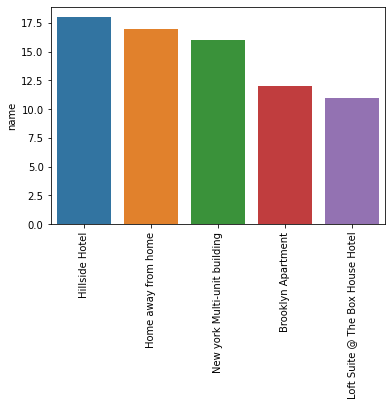

In [16]:
#Just, Plot this Data using CountPlot -
sns.barplot(x = df_Listings['name'].value_counts().head().index,
           y = df_Listings['name'].value_counts().head())

plt.xticks(rotation = 90)
plt.show()

In [17]:
#Let’s Replace the Null Value available in the "name" Column -
df_Listings['name'].fillna(value = 'Home away from home', axis = 'index', inplace = True)

In [18]:
#Now, Cross-Check the Null Values -
df_Listings['name'].isnull().sum()

#Now, We can see, We've successfully 'impute'/'substitute' our "Category Data" with "Mode" Value.

0

### Data Cleaning : neighbourhood_group

In [19]:
#Dropping this Column as it has 100% Missing Data -
df_Listings.drop(labels = 'neighbourhood_group', axis = 'columns', inplace = True)

### Data Cleaning & Imputation : host_name

In [20]:
#Checking the Null/Missing Values -
df_Listings['host_name'].isnull().sum()

21

In [21]:
#Computing the "Mode" of this Feature -
df_Listings['host_name'].mode()

0    Michael
dtype: object

In [22]:
#Computing the "Mode" of this Feature -
df_Listings['host_name'].mode()

0    Michael
dtype: object

In [23]:
#Checking the Occurence of the Data - 
df_Listings['host_name'].value_counts()

Michael              417
David                403
Sonder (NYC)         327
John                 294
Alex                 279
                    ... 
Rhonycs                1
Brandy-Courtney        1
Shanthony              1
Aurore And Jamila      1
Ilgar & Aysel          1
Name: host_name, Length: 11452, dtype: int64

In [24]:
#Substituting/Inputing the Null/Missing Data -
df_Listings['host_name'].fillna(value = 'Michael', axis = 'index', inplace = True)

In [25]:
#Cross-Check the Null Values -
df_Listings['host_name'].isnull().sum()

0

## @Regarding the Host -


*   Who are Top Earners?
*   Is there any Relationship between host_name and Prices?



In [26]:
df_Listings.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [27]:
# lets find Who are Top Earners in terms of Host Names?

df_data = df_Listings.groupby(['host_name'])['price'].mean().reset_index().sort_values(by='price', ascending=False)[0:20]
df_data = df_data.round(decimals = 2)
df_data

,host_name,price
8034,Olson,9999.00
8986,Rum,8500.00
4663,Jay And Liz,6000.00
9223,Sarah-B,5000.00
9222,Sarah-2,5000.00
7905,Nony,4200.00
5423,Kathrine,3501.67
4757,Jelena,3400.00
6399,Luxury Property,3000.00
8859,Rogelio,2999.00


In [28]:
#Now, Let's Plot this Data -
fig = px.bar(data_frame = df_data, 
             x = df_data['price'], 
             y = df_data['host_name'],
             color = 'price',
            text = 'price',
            labels = {'host_name':'Name of the Hosts', 'price':'Avg. Earnings'})

fig.update_layout(template = 'plotly_dark', title_text = "Top 20 Earners in terms of Host Names", yaxis={'categoryorder':'total ascending'})
fig.show(renderer="colab")

### Conclusion -
*   In the above Chart, we've listed/ploted **Top 20 Earners** in terms of Hosts, one after the other.
*   From the above visual, We can say that **"Olson" is the Top Earner** followed by "Rum" and "Jay And Liz".

## Conclusions -


*   From this, you can come up with Various Conclusions like -
*   there are some missing values are presents in the feature like last_review, 
reviews_per_month & name, host_name
*   In the feature of 'name' the maximum count of Hillside Hotel is 18




In [29]:
df_Listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [30]:
#Q3. Price comparison in terms of "property_type", And "room_type".
data_df = df_Listings.groupby(['room_type'], as_index=False)['price'].agg('mean')
#data_df.sort_values(by='price', ascending=False, inplace=True)
data_df.head()

,room_type,price
0,Entire home/apt,211.794246
1,Private room,89.780973
2,Shared room,70.127586


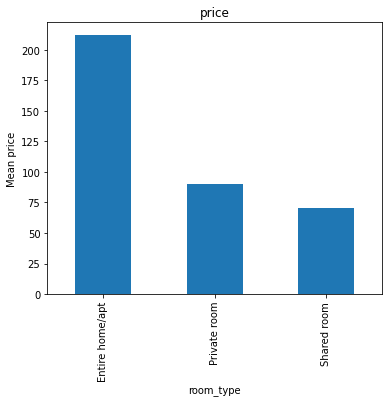

In [31]:
#df = df.replace(np.nan, 0)
data_df = data_df.groupby(['room_type'])['price'].mean()

data_df.plot(kind='bar', title='price', ylabel='Mean price',label='room_type', figsize=(6, 5))

## Conclusions -


*   The count of room_types:

         Entire home/apt    25409

         Private room       22326

         Shared room         1160


So.. the maximum count of room_types is Entire home/apt thats why the mean of Entire Home/apt with respect to price is High

Other wise the maximum price of room_types is Private room which price is around 2531

### Most Preferred "Room Type" by Guests - OR
### To know which Room Type got more Number of Bookings:

In [32]:
#Q4. Preference of Guests w.r.t. room Type -
df = df_Listings['room_type'].value_counts()
df = df.reset_index()#(inplace=True)
df.columns = ['room_Type', 'Count']
df.head()

,room_Type,Count
0,Entire home/apt,25409
1,Private room,22326
2,Shared room,1160


In [33]:
#Now, Let's Plot this Data -
fig = px.sunburst(df, path = ['room_Type', 'Count'],
                 values = 'Count', 
                 color='Count', 
                 title='Preference of Guests w.r.t. room Type')

fig.show(renderer="colab")


## Conclusions -
*   This beautiful "sunburst" displays/shows the Most Preferred 'room Type' by Guests.
*   From All these Guests Room Preference, We can observe the one thing that Mostly Guests prefer "Entire room/apt" Rooms not Much Expensive, nor Much Less.

In [34]:
#Q5. Preference of Guests w.r.t. Room Type -
fig = px.pie(data_frame = df_Listings, 
             names = df_Listings['room_type'].value_counts().index, 
             values = df_Listings['room_type'].value_counts(),
            title = 'Preference of Guests w.r.t. Room Type')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show(renderer="colab")

## Conclusion -
*   This beautiful "Pie Chart" displays/shows the Most Preferred 'Room Type' by Guests.
*   To conclude this Chart, We can say, "Entire home/apt" was the First Choice/Most Preferred Room Type by approx. '52%' Guests followed by "Private Room" and "Shared Room" which are about '45.7%' & '2.37%' respectively.
*   From Overall distribution, We can say, "Shared Room" has much Less Preferred by the Guests. This might because of there is a likelihood/possiblity like Most of the Guests Not prefer to Stay in Shared Room because they don't want to lose the Privacy there / as there is lack of Privacy and got disturbances by others.

## Find-out All the Affordable/Budgeted AirBnB -

In [35]:
data = df_Listings.copy()
data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [36]:
data.name.value_counts().sum()

48895

In [37]:
data.shape

(48895, 15)

In [38]:
#Q7. Find All the AirBnB's that are below 500 (Budget Hotels) as well as Affordable.
data = data[(data['price']<=500) & (data['price']>0)]
data.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [39]:
#Cross-Checking the Data in 'price' -
data['price'].unique()

array([149, 225, 150,  89,  80, 200,  60,  79, 135,  85, 120, 140, 215,
        99, 190, 299, 130, 110,  44, 180,  50,  52,  55,  70,  35,  40,
        68, 115, 151, 228, 144,  69,  49, 375, 250, 275, 230,  51,  65,
       105,  95, 145, 285,  94, 131,  98, 100, 125, 175, 500, 101, 220,
        59, 350, 199, 325, 235, 170, 400,  75,  90, 185,  77,  76, 160,
       195, 156, 219, 475, 165, 196,  83, 123, 265, 249, 121,  45,  71,
        64, 159, 189, 239, 305, 155,  92,  36,  37, 205,  39, 390, 129,
       212, 124, 122, 109, 229, 169, 113, 179, 349, 139,  67, 211, 290,
        87, 395, 260,  97, 132, 141, 495, 259,  96, 295, 451, 300,  42,
       255,  72,  88, 450, 198,  46,  33, 106,  91, 429, 107,  43, 248,
        41, 157, 172, 146, 116, 288, 270, 241, 399, 438, 279, 137, 280,
       226, 154, 246, 119,  81,  54,  48,  58, 153,  73, 485, 310, 167,
       147,  34,  93,  56, 127, 402,  30, 240, 385,  47, 209, 192,  86,
       245, 499, 387, 178,  20,  74, 104, 298, 269, 138, 208, 14

In [40]:
data = data[['name','price']]
data

,name,price
0,Clean & quiet apt home by the park,149
1,Skylit Midtown Castle,225
2,THE VILLAGE OF HARLEM....NEW YORK !,150
3,Cozy Entire Floor of Brownstone,89
4,Entire Apt: Spacious Studio/Loft by central park,80
...,...,...
48890,Charming one bedroom - newly renovated rowhouse,70
48891,Affordable room in Bushwick/East Williamsburg,40
48892,Sunny Studio at Historical Neighborhood,115
48893,43rd St. Time Square-cozy single bed,55


In [41]:
#Let's Plot this Data -
fig = px.bar(data_frame = data, 
             y = data['name'][0:20], 
             x = data['price'][0:20], 
             color = data['price'][0:20], 
             text = data['price'][0:20],
            labels = {'x':'Price', 'y':'AirBnB Names'})

fig.update_layout(template = 'plotly', title_text = "Affordable/Budgeted AirBnB",yaxis={'categoryorder':'total ascending'})
fig.show(renderer="colab")

## Conclusion -


*   Now, We can Conclude that, We have Total "110454" AirBnB's which are the Affordable/Budgeted AirBnB's that are below "500". It means, these are come under our "Budget Hotel" as well as they are "Affordable".
*   From this above Visual, We can see the some of the Affordable/Budgeted AirBnB's along with their Names and Price.

In [ ]:
#Q8. Top 20 Cheapest AirBnB with Approx. Price -
data = data[['name', 'price']].sort_values(by = 'price').nsmallest(20, columns = 'price')
data

,name,price
22287,Jen Apt,10
2860,Large furnished 2 bedrooms- - 30 days Minimum,10
23256,"Quiet, Cozy UES Studio Near the Subway",10
32810,Gigantic Sunny Room in Park Slope-Private Back...,10
31407,Cozy feel at home studio,10
24100,"Girls only, cozy room one block from Times Square",10
35601,"Charming, bright and brand new Bed-Stuy home",10
27972,Spacious 2-bedroom Apt in Heart of Greenpoint,10
35386,Cozy room in a three-bedroom House,10
47218,Beautiful room in Bushwick,10


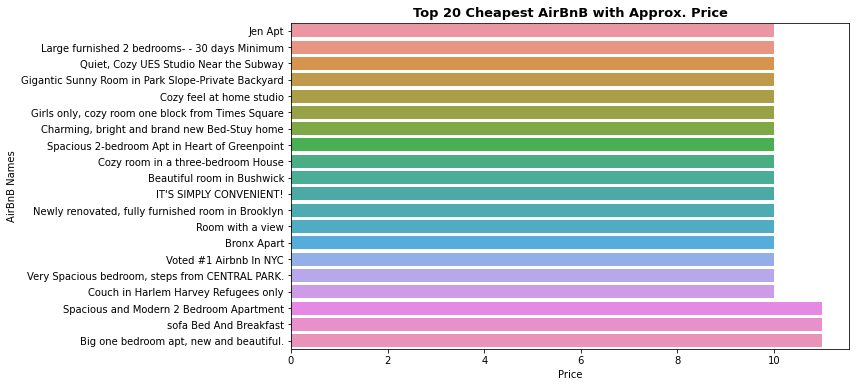

In [ ]:
#Let's Plot this Data -
plt.figure(figsize=(10,6))
sns.barplot(y = 'name',
           x = 'price',
           data = data)

plt.xlabel('Price')
plt.ylabel('AirBnB Names')
plt.title('Top 20 Cheapest AirBnB with Approx. Price', fontsize = 13, fontweight = 'bold')

plt.show()

## Conclusion -
*   From this above Visual, We can see the our Top 20 Cheapest AirBnB with Approx. Price.

In [ ]:
#Q9. Most Expensive AirBnB's -

df_data = df_Listings.groupby(['name', 'room_type'])['price'].mean().reset_index().sort_values(by='price', 
                                                                                               ascending=False)[0:20]
df_data

,name,room_type,price
26854,Luxury 1 bedroom apt. -stunning Manhattan views,Entire home/apt,10000.0
19936,Furnished room in Astoria apartment,Private room,10000.0
1108,1-BR Lincoln Center,Entire home/apt,10000.0
2214,2br - The Heart of NYC: Manhattans Lower East ...,Entire home/apt,9999.0
35615,"Quiet, Clean, Lit @ LES & Chinatown",Private room,9999.0
40439,Spanish Harlem Apt,Entire home/apt,9999.0
7026,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,Entire home/apt,8500.0
19453,Film Location,Entire home/apt,8000.0
18107,East 72nd Townhouse by (Hidden by Airbnb),Entire home/apt,7703.0
2734,70' Luxury MotorYacht on the Hudson,Entire home/apt,7500.0


In [ ]:
#Now, Let's Plot this Data -
fig = px.bar(data_frame = df_data, 
             x = df_data['price'], 
             y = df_data['name'],
             color = 'price',
            text = 'price',
            labels = {'name':'Name of the AirBnB', 'price':'Avg. Price'})

fig.update_layout(template = 'plotly_dark', title_text = "Top 20 Most Expensive AirBnB's",yaxis={'categoryorder':'total ascending'})
fig.show(renderer="colab")

## Conclusion -


*   In the above Chart, we've listed/ploted Top 20 Most Expensive AirBnB's, one after the other.
*   From the above visual, We can say that "Luxury 1 bedroom apt. -stunning Manhattan views", "Furnished room in Astoria apartment" & "1-BR Lincoln Center"  are the Most Expensive ones followed by "Rosecrans Beauty" and "180 View La Jolla Ocean Front".
*   On Top of that, We've also observed that Most of these/Almost All these Expensive ones has bookings for "Entire home/apt" as a Room Type. Hence, It seems to be like Most of the guests prefer to Stay in "Entire home/apt" and AirBnB has More Earners from these kind of Room Types.

## @Regarding the Neighbourhood -
*   Any particular Location getting Maximum Number of Bookings.
*   Price relation with respect to Location.

In [ ]:
df_Listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
#Q11. Any particular Location (neighbourhood) getting Maximum Number of Bookings.
df = df_Listings['neighbourhood'].value_counts().nlargest(10)
df

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

In [ ]:
#Now, Let's plot this Data -
fig = px.pie(data_frame = df, 
             names = df.index, 
             values = df, 
             title = 'Top 10 Neighbourhood Locations w.r.t Maximum Number of Bookings')

fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show(renderer="colab")

## Conclusion -
*   This Pie Chart shows, Top 10 Neighbourhood Locations who's having Maximum Number of Bookings.
*   To conclude above Chart, We can say, In terms of Neighbourhood Locations, Most of the Bookings were takes place for "Williamsburg " of around "16.7%" followed by "Bedford-Stuyvesant", "Harlem " which has "15.8%" & "11.3%" respectively...

### To know which particular Location (Neighbourhood) getting Maximum Number of Bookings.

In [ ]:
#Alternate Visual for: Q11. Any particular Location (neighbourhood) getting Maximum Number of Bookings.
df_Listings["neighbourhood"].value_counts()

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Fort Wadsworth           1
Richmondtown             1
New Dorp                 1
Rossville                1
Willowbrook              1
Name: neighbourhood, Length: 221, dtype: int64

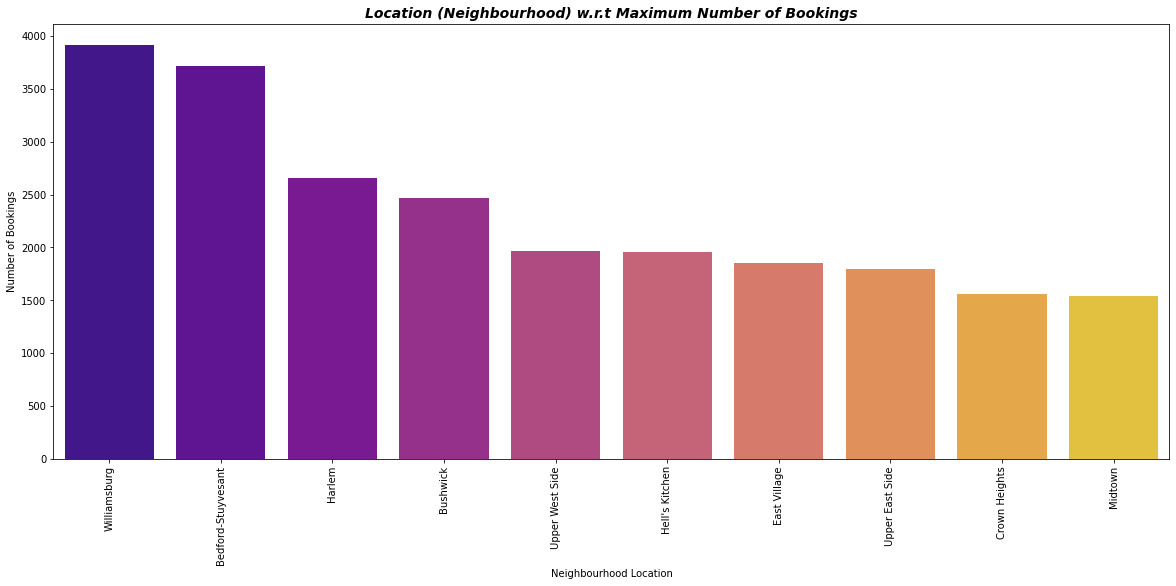

In [ ]:
#Now, Let's Plot this Data - Using "Seaborn":
fig = plt.subplots(figsize = (20,8))
sns.set_style = "darkgrid"

sns.countplot(x = df_Listings["neighbourhood"], order = df_Listings["neighbourhood"].value_counts()[:10].index, palette = "plasma")

plt.xticks(rotation = 90)
plt.title("Location (Neighbourhood) w.r.t Maximum Number of Bookings", fontsize = 14, fontweight = 'bold', fontstyle = 
          'italic')
plt.xlabel('Neighbourhood Location')
plt.ylabel('Number of Bookings')

plt.show()

## Conclusion -


*   This Bar Chart shows, Neighbourhood Locations who's having Maximum Number of Bookings.
*   To conclude above Chart, We can say, In terms of Neighbourhood Locations, Most of the Bookings were takes place for "Williamsburg " of around "16.7%" followed by "Bedford-Stuyvesant", "Harlem " which has "15.8%" & "11.3%" respectively...

## @Regarding the Price -

### Price vs Location -

In [ ]:
#Q12. Price relation with respect to Location - (Price vs Location)

df_relation = df_Listings[['neighbourhood', 'price']].sort_values(by = 'price').nlargest(1000, columns = 'price')
df_relation

'''data = data[['name', 'price']].sort_values(by = 'price').nsmallest(20, columns = 'price')
data'''

"data = data[['name', 'price']].sort_values(by = 'price').nsmallest(20, columns = 'price')\ndata"

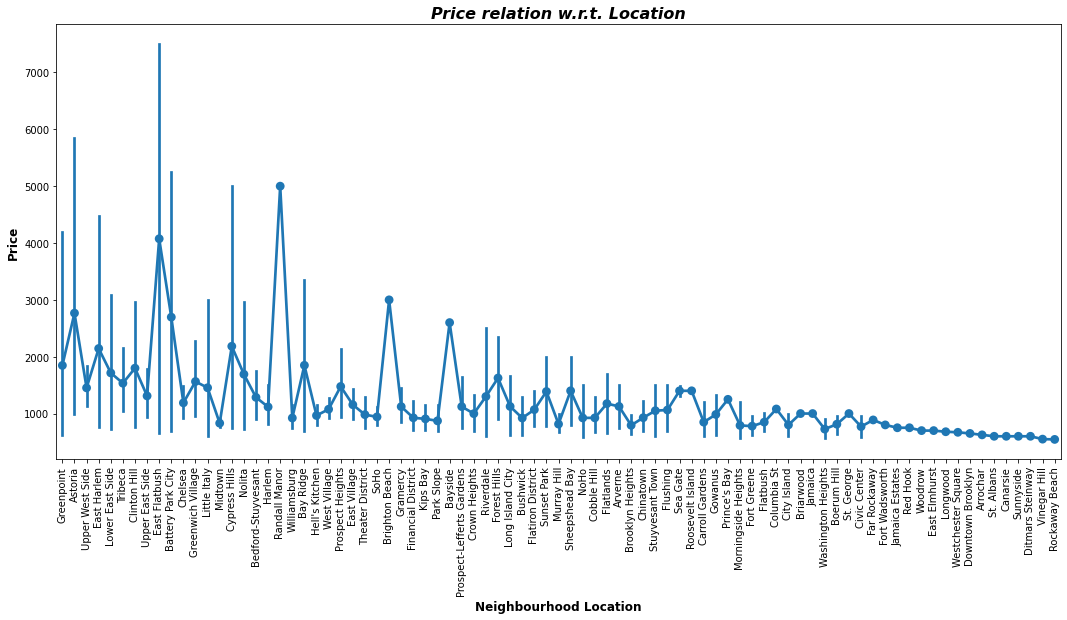

In [ ]:
#Now, Let's Plot this Data -
plt.figure(figsize=(18,8))
sns.pointplot(y = 'price', 
                x = 'neighbourhood', 
               #hue = 'neighbourhood',
               size = 'price',
               data = df_relation,
               legend = False)

plt.xticks(rotation = 90)

plt.title('Price relation w.r.t. Location', fontsize = 16, fontweight = 'bold', fontstyle = 'italic')
plt.xlabel('Neighbourhood Location', fontsize = 12, fontweight = 'bold')
plt.ylabel('Price', fontsize = 12, fontweight = 'bold')
plt.show()

## Conclusions -


*   This is our beautiful point Plot which depicts the Relationship between Price w.r.t. Location.
*   From this point Plot, It is clear that, Top 20s AirBnB's that are located at "Astoria" and "Green point", were Super Expensive and at the same time, there are less Number of AirBnB's available which are "Bushwick & Flatiron District.
*   On the other hand, We can say, best Location (Neighbourhood) with lower Priced AirBnB has Most of the Bookings / Most preferred by the Guests.
*   If we deep dive into this, We can clearly see that, As "Green point" Location has Moderate Level Priced, Most of the guests preferred to Stay there. Next, If we see the "East flatbush" on, Prices are slightly high compared to "Green point". Hence, less number of guests prefer to stay here than "Green Point".
*   So, To conclude this, We can say, Most of the guest prefer to have bookings for "best Locations (Neighbourhood)" and at the same time, "Moderate level Priced" AirBnB's.

## @Regarding the Reviews -

In [ ]:
df_Listings.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'last_review', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

In [ ]:
df_data.price.value_counts().nlargest

<bound method Series.nlargest of 500.000000     4
2531.666667    1
550.000000     1
547.500000     1
515.000000     1
427.500000     1
416.000000     1
Name: price, dtype: int64>

In [ ]:
df_data = df_Listings.groupby(['reviews_per_month','room_type'])['price'].mean().reset_index().sort_values(by='price', 
                                                                                               ascending=False)[0:20]

In [ ]:
df_data

,reviews_per_month,room_type,price
1527,6.15,Private room,2531.666667
1610,6.67,Entire home/apt,550.000000
1660,7.02,Entire home/apt,547.500000
1639,6.84,Entire home/apt,515.000000
1424,5.62,Entire home/apt,500.000000
1620,6.73,Entire home/apt,500.000000
1754,7.86,Entire home/apt,500.000000
1954,14.00,Entire home/apt,500.000000
1479,5.89,Entire home/apt,427.500000
1565,6.38,Entire home/apt,416.000000


In [ ]:
#Let's Plot this Data -
fig = px.bar(data_frame = data, 
             y = df_data['price'][0:2], 
             x = df_data['room_type'][0:2], 
             color = df_data['room_type'][0:2], 
             text = df_data['room_type'][0:2],
            labels = {'x':'room_type', 'y':'price'})

fig.update_layout(template = 'seaborn', title_text = "Affordable/Budgeted AirBnB",yaxis={'categoryorder':'total ascending'})
fig.show(renderer="colab")

In [ ]:
df_data = df_Listings.groupby(['reviews_per_month','room_type'])['price'].mean().reset_index().sort_values(by='price', 
                                                                                               ascending=False)[0:10]

In [ ]:
#Let's Plot this Data -
fig = px.bar(data_frame = data, 
             x = df_data['room_type'][0:10], 
             y = df_data['reviews_per_month'][0:10], 
             color = df_data['reviews_per_month'][0:10], 
             text = df_data['reviews_per_month'][0:10],
            labels = {'y':'reviews_per_month', 'x':'room_type'})

fig.update_layout(template = 'ggplot2', title_text = "Affordable/Budgeted AirBnB",yaxis={'categoryorder':'total ascending'})
fig.show(renderer="colab")

## @ Final Conclusions:


*   Top 20 Earners in terms of Hosts, one after the other. We can say that "Olson" is the Top Earner followed by "Rum" and "Jay And Liz".
*   In the feature of 'name' the maximum count of Hillside Hotel is 18
*   We can observe the one thing that Mostly Guests prefer "Entire room/apt" Rooms not Much Expensive, nor Much Less.
*   We can say, "Entire home/apt" was the First Choice/Most Preferred Room Type by approx. '52%' Guests followed by "Private Room" and "Shared Room" which are about '45.7%' & '2.37%' respectively.
*   We can say, "Shared Room" has much Less Preferred by the Guests. This might because of there is a likelihood/possiblity like Most of the Guests Not prefer to Stay in Shared Room.
*   We have Total "110454" AirBnB's which are the Affordable/Budgeted AirBnB's that are below "500". It means, these are come under our "Budget Hotel" as well as they are "Affordable".
*   the "Luxury 1 bedroom apt. -stunning Manhattan views", "Furnished room in Astoria apartment" & "1-BR Lincoln Center" are the Most Expensive ones followed by "Rosecrans Beauty" and "180 View La Jolla Ocean Front".
*   Most of these/Almost All these Expensive ones has bookings for "Entire home/apt" as a Room Type. Hence, It seems to be like Most of the guests prefer to Stay in "Entire home/apt" and AirBnB has More Earners from these kind of Room Types.
*   In terms of Neighbourhood Locations, Most of the Bookings were takes place for "Williamsburg " of around "16.7%" followed by "Bedford-Stuyvesant", "Harlem " which has "15.8%" & "11.3%" respectively...
*   In terms of Neighbourhood Locations, Most of the Bookings were takes place for "Williamsburg " of around "16.7%" followed by "Bedford-Stuyvesant", "Harlem " which has "15.8%" & "11.3%" respectively...
*   Top 20s AirBnB's that are located at "Astoria" and "Green point", were Super Expensive and at the same time, there are less Number of AirBnB's available which are "Bushwick & Flatiron District.
*   best Location (Neighbourhood) with lower Priced AirBnB has Most of the Bookings / Most preferred by the Guests.
*   As "Green point" Location has Moderate Level Priced, Most of the guests preferred to Stay there. Next, If we see the "East flatbush" on, Prices are slightly high compared to "Green point". Hence, less number of guests prefer to stay here than "Green Point".
*   Most of the guest prefer to have bookings for "best Locations (Neighbourhood)" and at the same time, "Moderate level Priced" AirBnB's.